In [1]:
import warnings 
warnings.filterwarnings('ignore')

# Data Understanding and Exploaration

In [2]:
import pandas as pd
import numpy as np 

In [3]:
dataset=pd.read_csv("day.csv")

In [4]:
dataset.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
dataset.shape

(730, 16)

In [6]:
dataset.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [7]:
dataset.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [9]:
#Assigning string values to different seasons instead of numeric values

#1 for spring
dataset.loc[(dataset['season']==1),'season']='spring'

#2 for summer
dataset.loc[(dataset['season']==2),'season']='summer'

#3 for fall
dataset.loc[(dataset['season']==3),'season']='fall'

#4 for winter
dataset.loc[(dataset['season']==4),'season']='winter'


In [10]:
dataset['season'].astype('category').value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [11]:
#0 - 2018 ,1 - 2019 : year
dataset['yr'].astype('category').value_counts()

0    365
1    365
Name: yr, dtype: int64

In [12]:
# Assigning string values to different months instead of numeric values
def object_map_mnths(x):
    return x.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

In [13]:
dataset[['mnth']]=dataset[['mnth']].apply(object_map_mnths)

In [14]:
dataset['mnth'].astype('category').value_counts()

Aug    62
Dec    62
Jan    62
Jul    62
Mar    62
May    62
Oct    62
Apr    60
Jun    60
Nov    60
Sep    60
Feb    56
Name: mnth, dtype: int64

In [15]:
dataset['holiday'].astype('category').value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [16]:
def str_map_weekdays(x):
    return x.map({1:'Mon',2:'Tue',3:'Wed',4:'Thurs',5:'Fri',6:'Sat',0:'Sun'})

In [17]:
dataset[['weekday']]=dataset[['weekday']].apply(str_map_weekdays)

In [18]:
dataset['weekday'].astype('category').value_counts()

Mon      105
Sat      105
Sun      105
Fri      104
Thurs    104
Tue      104
Wed      103
Name: weekday, dtype: int64

In [19]:
dataset['workingday'].astype('category').value_counts()

1    499
0    231
Name: workingday, dtype: int64

In [20]:
#1 - clear, few clouds,party cloudly
dataset.loc[(dataset['weathersit']==1),'weathersit']='A'

#2 - mist ,cloudy
dataset.loc[(dataset['weathersit']==2),'weathersit']='B'

#3 - light snow,heavy rain
dataset.loc[(dataset['weathersit']==3),'weathersit']='C'

In [21]:
dataset['weathersit'].astype('category').value_counts()

A    463
B    246
C     21
Name: weathersit, dtype: int64

# 2 Data Visualisation

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

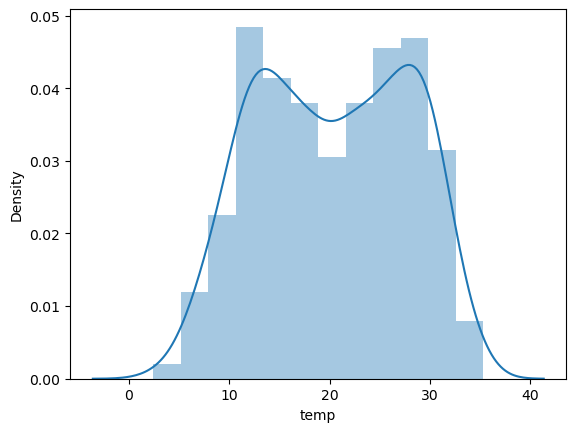

In [23]:
sns.distplot(dataset['temp'])
plt.show()

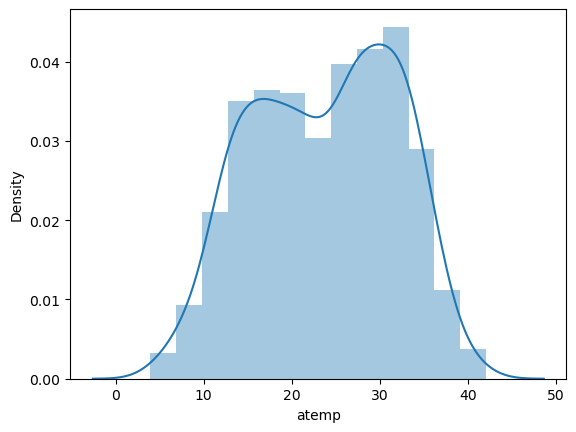

In [24]:
sns.distplot(dataset['atemp'])
plt.show()

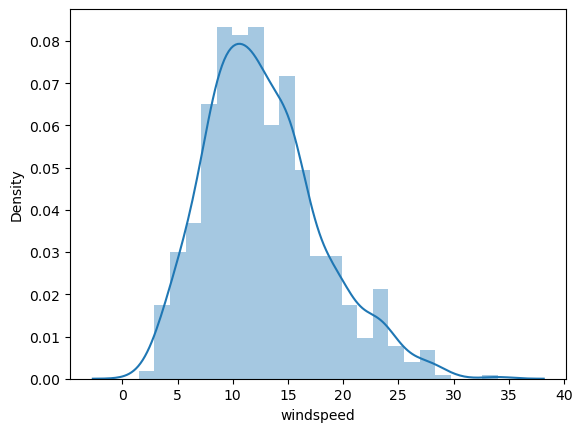

In [25]:
sns.distplot(dataset['windspeed'])
plt.show()

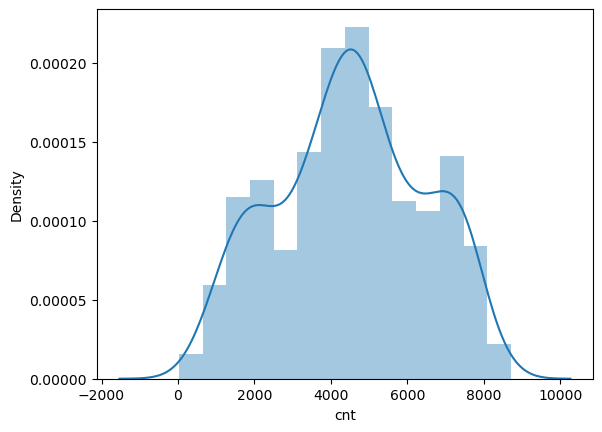

In [26]:
sns.distplot(dataset['cnt'])
plt.show()

In [27]:
dataset['dteday']=dataset['dteday'].astype('datetime64')

In [28]:
dataset_categorical = dataset.select_dtypes(exclude=['float64','datetime64','int64'])

In [29]:
dataset_categorical.columns

Index(['season', 'mnth', 'weekday', 'weathersit'], dtype='object')

In [30]:
dataset_categorical

,season,mnth,weekday,weathersit
0,spring,Jan,Sat,B
1,spring,Jan,Sun,B
2,spring,Jan,Mon,A
3,spring,Jan,Tue,A
4,spring,Jan,Wed,A
...,...,...,...,...
725,spring,Dec,Thurs,B
726,spring,Dec,Fri,B
727,spring,Dec,Sat,B
728,spring,Dec,Sun,A


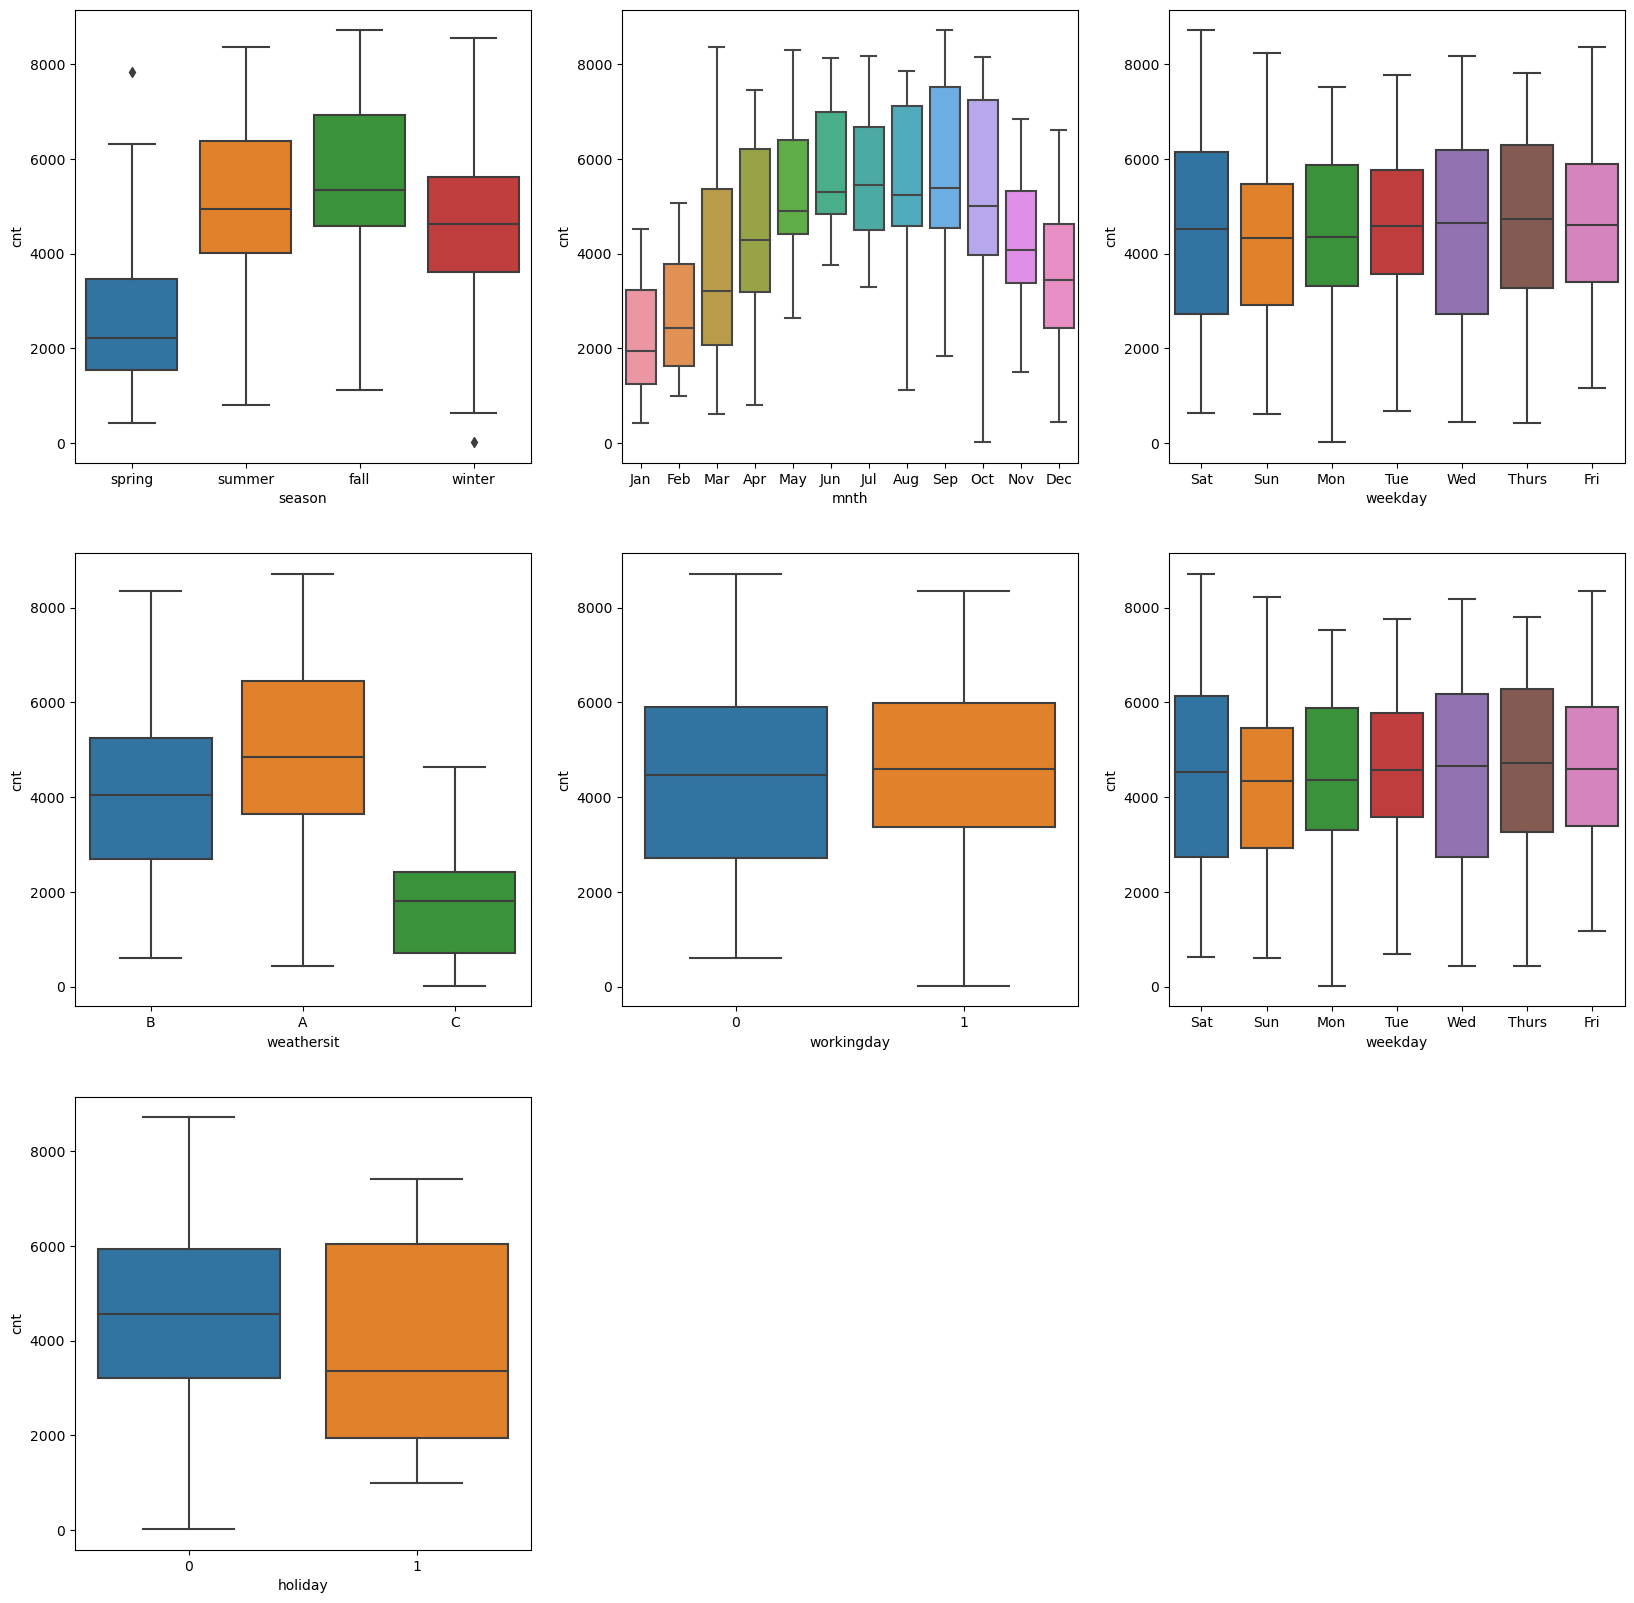

In [31]:
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.boxplot(x='season',y='cnt',data=dataset)
plt.subplot(3,3,2)
sns.boxplot(x='mnth',y='cnt',data=dataset)
plt.subplot(3,3,3)
sns.boxplot(x='weekday',y='cnt',data=dataset)
plt.subplot(3,3,4)
sns.boxplot(x='weathersit',y='cnt',data=dataset)
plt.subplot(3,3,5)
sns.boxplot(x='workingday',y='cnt',data=dataset)
plt.subplot(3,3,6)
sns.boxplot(x='weekday',y='cnt',data=dataset)
plt.subplot(3,3,7)
sns.boxplot(x='holiday',y='cnt',data=dataset)
plt.show()

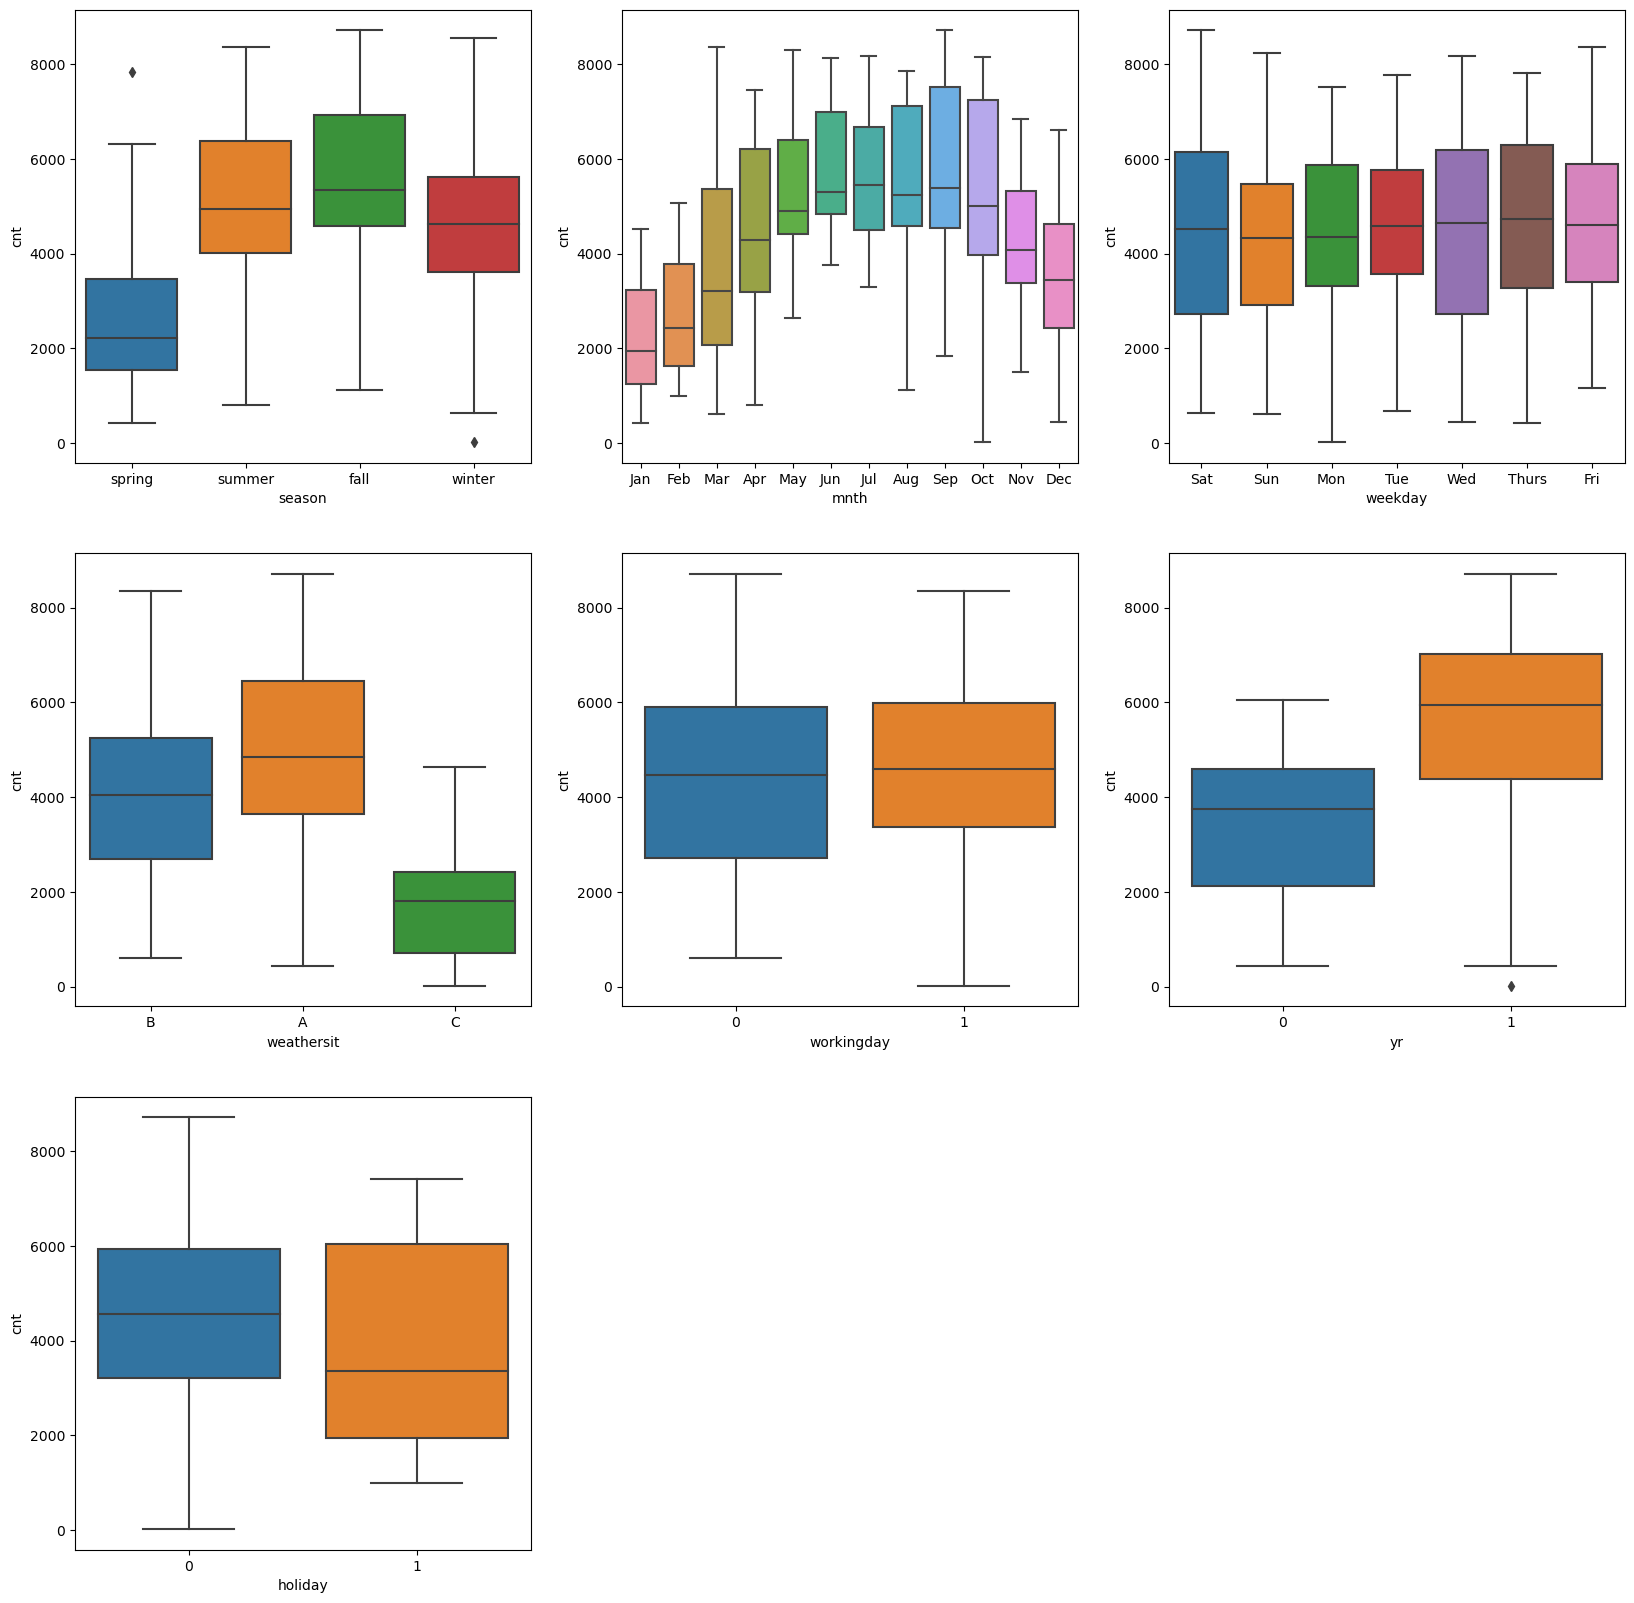

In [32]:
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.boxplot(x='season',y='cnt',data=dataset)
plt.subplot(3,3,2)
sns.boxplot(x='mnth',y='cnt',data=dataset)
plt.subplot(3,3,3)
sns.boxplot(x='weekday',y='cnt',data=dataset)
plt.subplot(3,3,4)
sns.boxplot(x='weathersit',y='cnt',data=dataset)
plt.subplot(3,3,5)
sns.boxplot(x='workingday',y='cnt',data=dataset)
plt.subplot(3,3,6)
sns.boxplot(x='yr',y='cnt',data=dataset)
plt.subplot(3,3,7)
sns.boxplot(x='holiday',y='cnt',data=dataset)
plt.show()

In [33]:
intvarlist=["casual","registered","cnt"]

for var in intvarlist:
    dataset[var]=dataset[var].astype("float")

In [34]:
dataset_numeric=dataset.select_dtypes(include=['float64'])
dataset_numeric.head()

,temp,atemp,hum,windspeed,casual,registered,cnt
0,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0
1,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0
2,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0
3,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0
4,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0


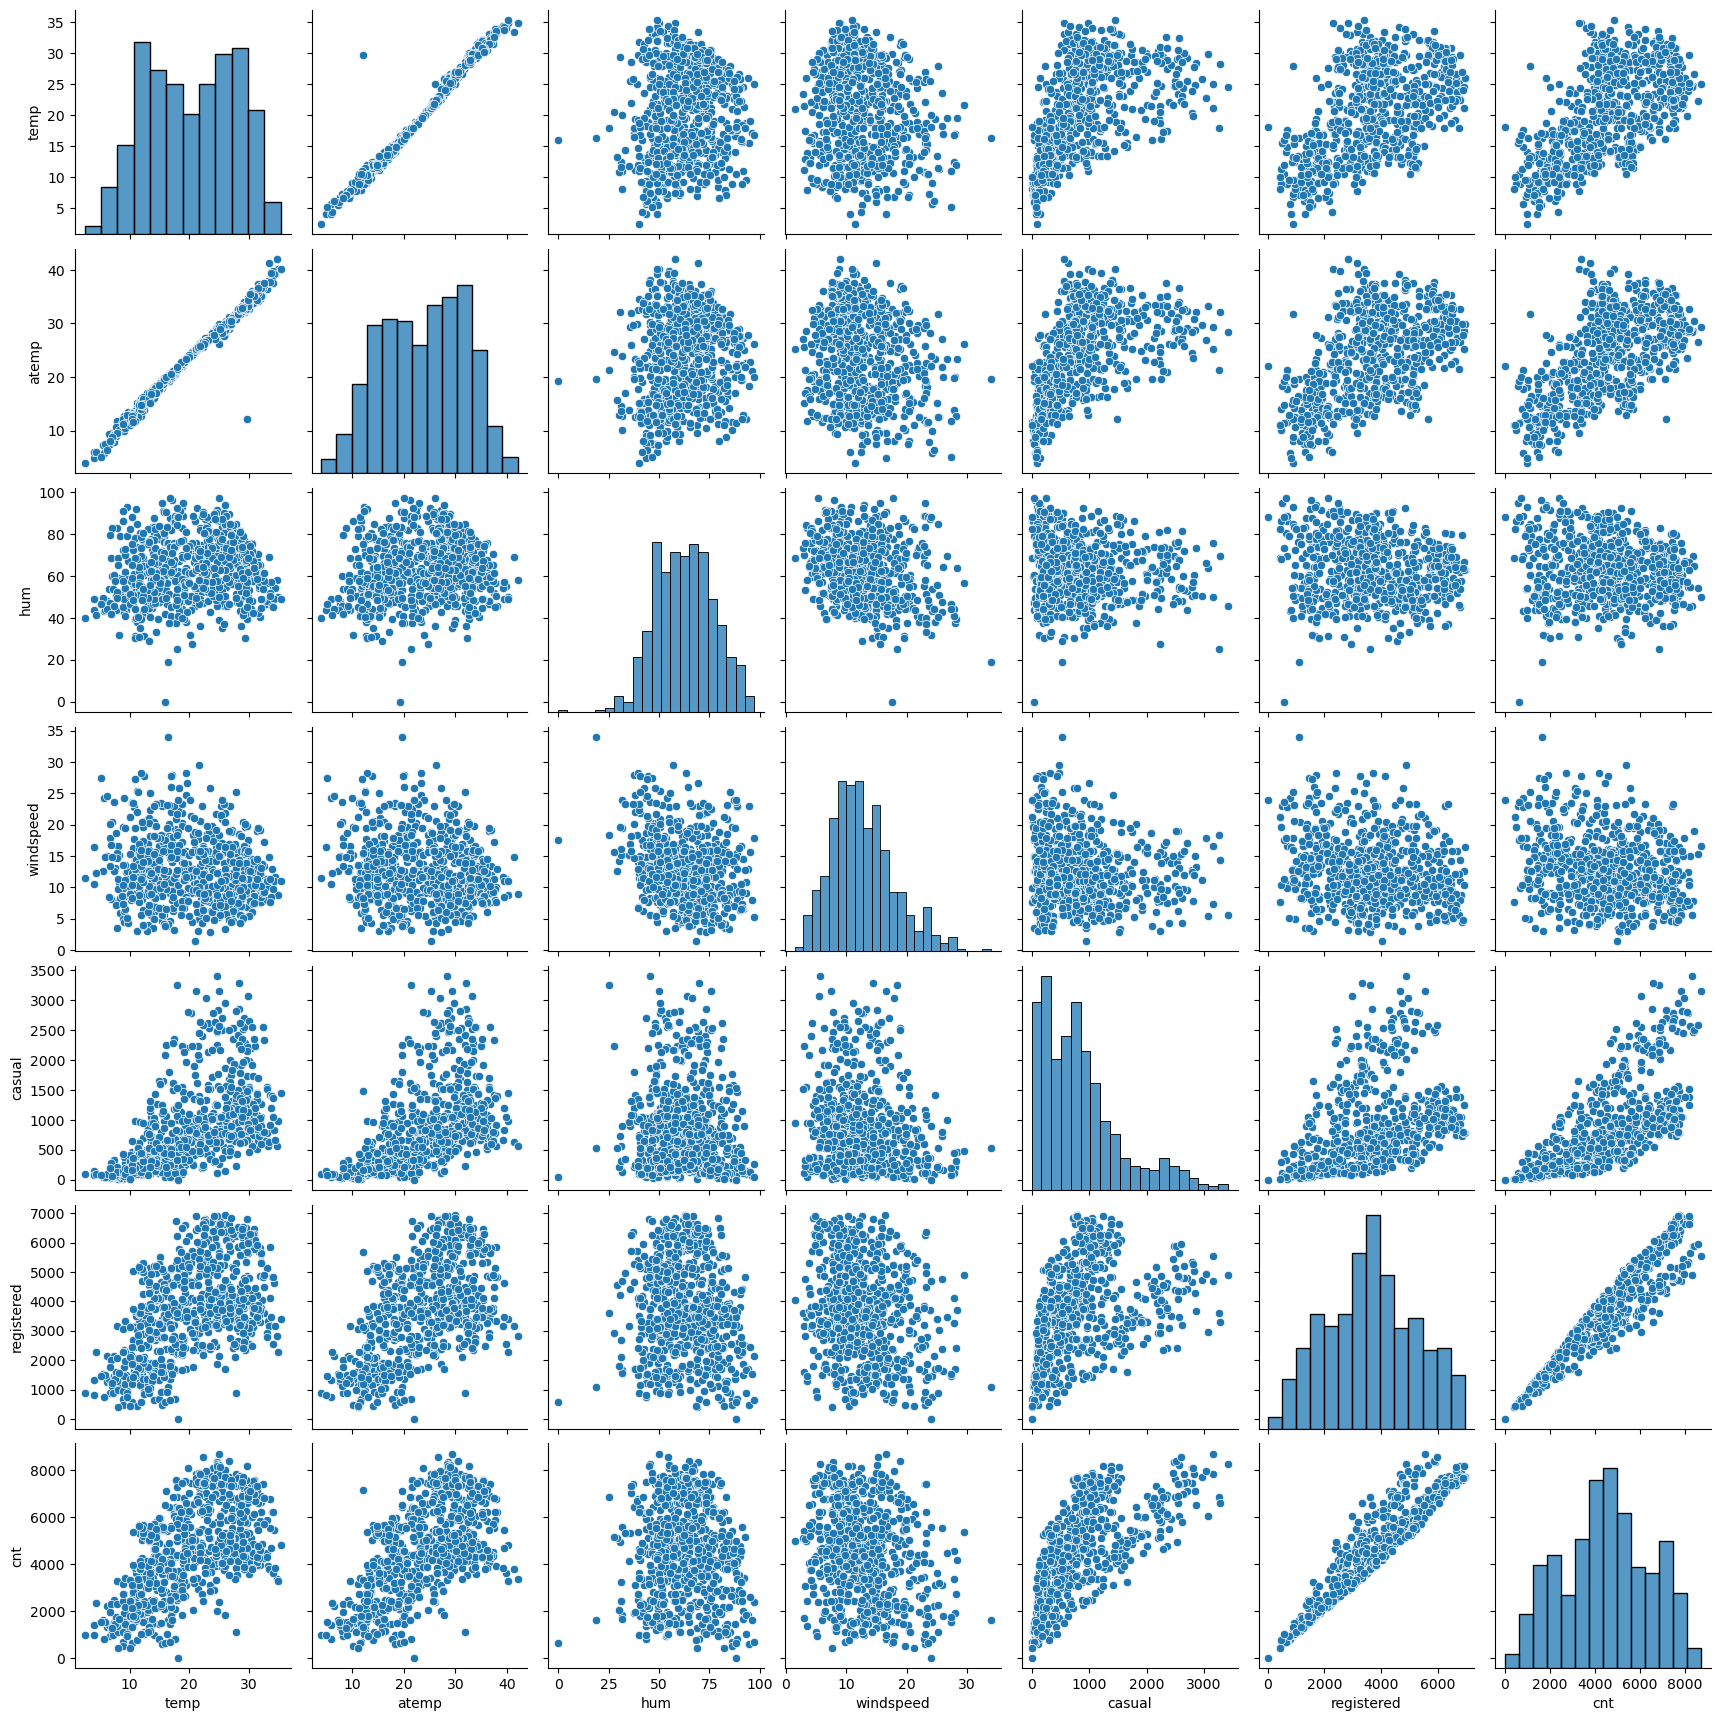

In [35]:
sns.pairplot(dataset_numeric)
plt.show()

In [36]:
cor=dataset_numeric.corr()
cor

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


<AxesSubplot:>

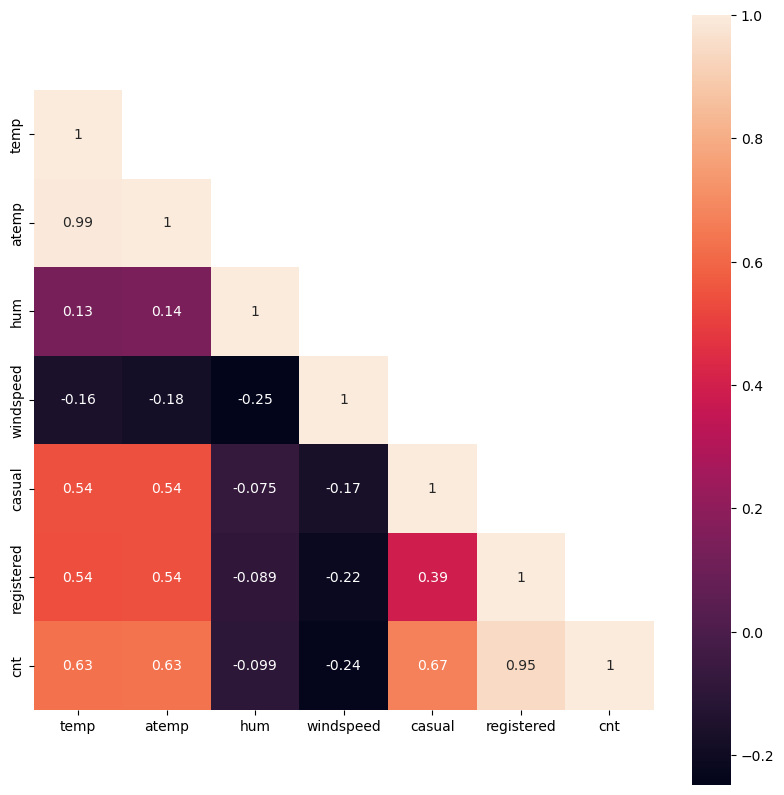

In [37]:
#heatmap
mask=np.array(cor)
mask[np.tril_indices_from(mask)] =False
fig ,ax=plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(cor,mask=mask,vmax=1,square=True,annot=True)

In [38]:
#Removing atemp as it is highlt correlated with temp
dataset.drop('atemp',axis=1,inplace=True)

In [39]:
dataset.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,Jan,0,Sat,0,B,14.110847,80.5833,10.749882,331.0,654.0,985.0
1,2,2018-02-01,spring,0,Jan,0,Sun,0,B,14.902598,69.6087,16.652113,131.0,670.0,801.0
2,3,2018-03-01,spring,0,Jan,0,Mon,1,A,8.050924,43.7273,16.636703,120.0,1229.0,1349.0
3,4,2018-04-01,spring,0,Jan,0,Tue,1,A,8.200000,59.0435,10.739832,108.0,1454.0,1562.0
4,5,2018-05-01,spring,0,Jan,0,Wed,1,A,9.305237,43.6957,12.522300,82.0,1518.0,1600.0


# 3.Data Preparation

In [40]:
dataset_categorical=dataset.select_dtypes(include=['object'])

In [41]:
dataset_categorical.head()

,season,mnth,weekday,weathersit
0,spring,Jan,Sat,B
1,spring,Jan,Sun,B
2,spring,Jan,Mon,A
3,spring,Jan,Tue,A
4,spring,Jan,Wed,A


In [42]:
dataset_dummies=pd.get_dummies(dataset_categorical,drop_first=True)
dataset_dummies.head()


,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [43]:
#drop categorical variables columns
dataset=dataset.drop(list(dataset_categorical.columns),axis=1)
dataset

,instant,dteday,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,0,0,0,14.110847,80.5833,10.749882,331.0,654.0,985.0
1,2,2018-02-01,0,0,0,14.902598,69.6087,16.652113,131.0,670.0,801.0
2,3,2018-03-01,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,1349.0
3,4,2018-04-01,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,1562.0
4,5,2018-05-01,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,1600.0
...,...,...,...,...,...,...,...,...,...,...,...
725,726,2019-12-27,1,0,1,10.420847,65.2917,23.458911,247.0,1867.0,2114.0
726,727,2019-12-28,1,0,1,10.386653,59.0000,10.416557,644.0,2451.0,3095.0
727,728,2019-12-29,1,0,0,10.386653,75.2917,8.333661,159.0,1182.0,1341.0
728,729,2019-12-30,1,0,0,10.489153,48.3333,23.500518,364.0,1432.0,1796.0


In [44]:
dataset=pd.concat([dataset,dataset_dummies],axis=1)
dataset.head()

,instant,dteday,yr,holiday,workingday,temp,hum,windspeed,casual,registered,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
0,1,2018-01-01,0,0,0,14.110847,80.5833,10.749882,331.0,654.0,...,0,0,0,1,0,0,0,0,1,0
1,2,2018-02-01,0,0,0,14.902598,69.6087,16.652113,131.0,670.0,...,0,0,0,0,1,0,0,0,1,0
2,3,2018-03-01,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,...,0,0,1,0,0,0,0,0,0,0
3,4,2018-04-01,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,...,0,0,0,0,0,0,1,0,0,0
4,5,2018-05-01,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,...,0,0,0,0,0,0,0,1,0,0


In [45]:
dataset=dataset.drop(['instant','dteday'],axis=1 , inplace=False)
dataset.head()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
0,0,0,0,14.110847,80.5833,10.749882,331.0,654.0,985.0,1,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,14.902598,69.6087,16.652113,131.0,670.0,801.0,1,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,1349.0,1,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,1562.0,1,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,1600.0,1,...,0,0,0,0,0,0,0,1,0,0


# 4.Model Buliding and Evaluation

In [46]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [47]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train , df_test =train_test_split(dataset,train_size=0.7,test_size=0.3,random_state=100)

In [48]:
df_train

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
653,1,0,1,19.201653,55.8333,12.208807,922.0,6612.0,7534.0,0,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,29.246653,70.4167,11.083475,968.0,6248.0,7216.0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,16.980847,62.1250,10.792293,956.0,3110.0,4066.0,1,...,0,0,0,1,0,0,0,0,1,0
728,1,0,0,10.489153,48.3333,23.500518,364.0,1432.0,1796.0,1,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,15.443347,48.9583,8.708325,1120.0,3100.0,4220.0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,29.554153,58.7917,13.916771,1017.0,5647.0,6664.0,0,...,0,0,1,0,0,0,0,0,1,0
578,1,0,1,30.852500,65.9583,8.666718,983.0,6278.0,7261.0,0,...,0,0,0,0,0,1,0,0,0,0
53,0,0,1,9.091299,42.3043,6.305571,139.0,1778.0,1917.0,1,...,0,0,0,0,0,0,0,1,0,0
350,0,0,0,10.591653,56.0833,16.292189,275.0,2464.0,2739.0,0,...,0,0,0,1,0,0,0,0,1,0


In [49]:
from sklearn.preprocessing import MinMaxScaler

In [50]:
scalar=MinMaxScaler()

In [51]:
var=["temp","hum","windspeed","casual","registered","cnt"]
df_train[var]=scalar.fit_transform(df_train[var])

In [52]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.254661,0.523944,0.513620,0.243137,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.343137,0.029412
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.206011,0.228175,0.224593,0.429398,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.094179,0.353487,0.356420,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.212740,0.525123,0.518638,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.327415,0.696073,0.684710,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


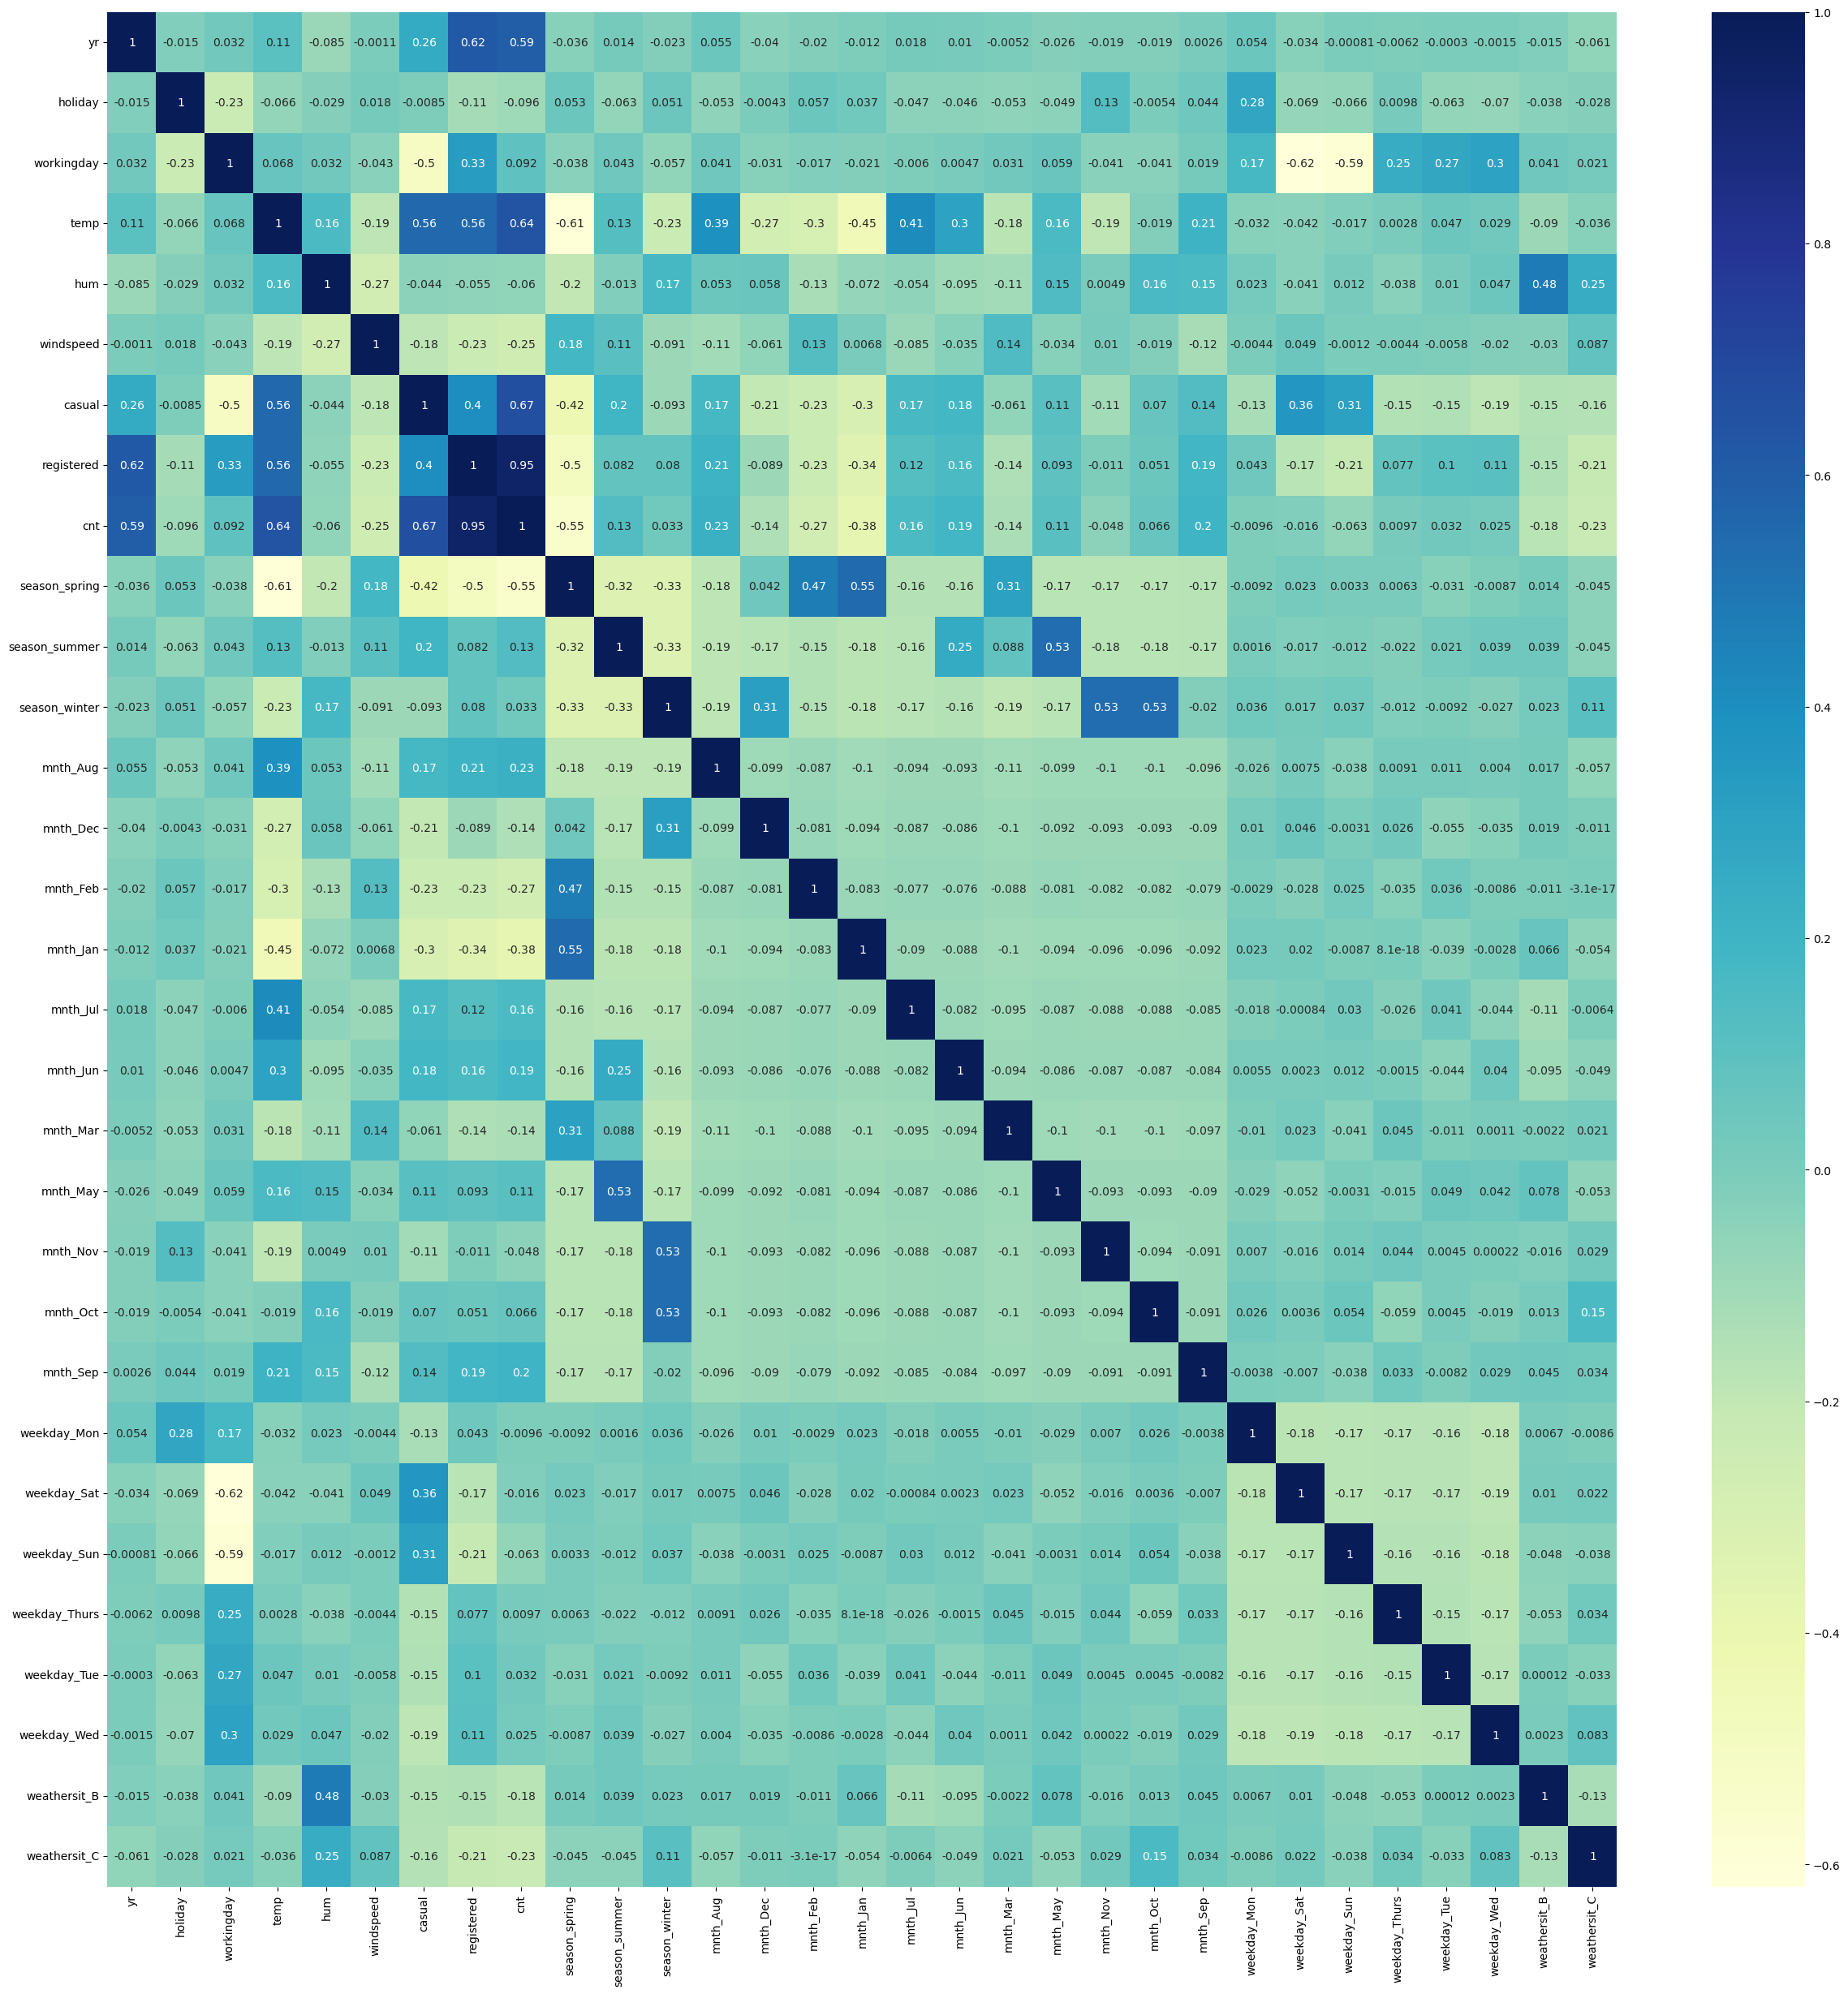

In [53]:
plt.figure(figsize=(30,30))
sns.heatmap(df_train.corr(),annot=True,cmap="YlGnBu")
plt.show()

In [54]:

x_train=df_train.drop(["casual","registered"],axis=1)
y_train=df_train.pop('cnt')

In [55]:
x_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,1,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [56]:
#np.array(x_train)

In [57]:
import statsmodels.api as sm
x_train_lm=sm.add_constant(x_train)
lr=sm.OLS(y_train,x_train_lm).fit()

In [58]:
lr.params

const            4.440892e-16
yr               1.214306e-16
holiday         -1.412065e-15
workingday      -1.595946e-16
temp             2.636780e-16
hum              0.000000e+00
windspeed        6.661338e-16
cnt              1.000000e+00
season_spring   -5.551115e-17
season_summer   -2.775558e-17
season_winter   -1.387779e-17
mnth_Aug         7.147061e-16
mnth_Dec         5.759282e-16
mnth_Feb         3.469447e-16
mnth_Jan         2.012279e-16
mnth_Jul         5.065393e-16
mnth_Jun         7.632783e-16
mnth_Mar         2.671474e-16
mnth_May         8.534840e-16
mnth_Nov         5.134781e-16
mnth_Oct         3.226586e-16
mnth_Sep         3.053113e-16
weekday_Mon      5.551115e-16
weekday_Sat      3.712308e-16
weekday_Sun      2.844947e-16
weekday_Thurs    6.487866e-16
weekday_Tue      3.330669e-16
weekday_Wed      6.036838e-16
weathersit_B    -2.498002e-16
weathersit_C     5.689893e-16
dtype: float64

In [59]:
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [60]:
print(lm.coef_)
print(lm.intercept_)

[ 6.09677636e-16 -2.08072101e-02 -2.08072101e-02  5.56014802e-16
 -8.84163436e-17  1.76688811e-16  1.00000000e+00  1.55464070e-16
  4.12037614e-17 -6.35844966e-17 -5.35393794e-17  1.08080645e-16
  1.21814140e-16  9.69750988e-17  2.37579823e-17 -1.91773513e-16
 -1.64686780e-17 -2.76647382e-16 -1.27213977e-16 -1.48366473e-16
  2.40296519e-17  1.78027108e-16 -2.08072101e-02 -2.08072101e-02
  1.67159508e-16  8.24576726e-17  1.42609237e-16 -2.61649983e-16
 -5.49633571e-17]
0.020807210125179165


In [61]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.738e+29
Date:                Mon, 11 Sep 2023   Prob (F-statistic):               0.00
Time:                        06:40:12   Log-Likelihood:                 16787.
No. Observations:                 510   AIC:                        -3.352e+04
Df Residuals:                     481   BIC:                        -3.339e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.441e-16   5.29e-16      0.840      0.401   -5.94e-16    1.48e-15
yr             1.214e-16    1.9e-16      0.639      0.523   -2.52e-16    4.95e-16
holiday       -1.412e-15   3.43e-16     -4.113      0.000   -2.09e-15   -7.38e-16
workingday    -1.596e-16   1.86e-16     -0.857      0.392   -5.26e-16    2.06e-16
temp           2.637e-16   7.24e-16      0.364      0.716   -1.16e-15    1.69e-15
hum                    0   5.59e-16          0      1.000    -1.1e-15     1.1e-15
windspeed      6.661e-16   3.87e-16      1.721      0.086   -9.42e-17    1.43e-15
cnt               1.0000   6.51e-16   1.54e+15      0.000       1.000       1.000
season_spring -5.551e-17    4.3e-16     -0.129      0.897      -9e-16    7.89e-16
season_summer -2.776e-17   3.76e-16     -0.074      0.941   -7.66e-16     7.1e-16
season_winter -1.388e-17   4.05e-16     -0.034      0.973   -8.09e-16    7.82e-16
mnth_Aug       7.147e-16   4.82e-16      1.484      0.138   -2.32e-16    1.66e-15
mnth_Dec       5.759e-16   4.81e-16      1.197      0.232   -3.69e-16    1.52e-15
mnth_Feb       3.469e-16   4.71e-16      0.737      0.461   -5.78e-16    1.27e-15
mnth_Jan       2.012e-16   4.81e-16      0.418      0.676   -7.44e-16    1.15e-15
mnth_Jul       5.065e-16   5.02e-16      1.009      0.313    -4.8e-16    1.49e-15
mnth_Jun       7.633e-16   3.59e-16      2.129      0.034    5.87e-17    1.47e-15
mnth_Mar       2.671e-16   3.51e-16      0.762      0.447   -4.22e-16    9.56e-16
mnth_May       8.535e-16   3.01e-16      2.838      0.005    2.63e-16    1.44e-15
mnth_Nov       5.135e-16    5.2e-16      0.987      0.324   -5.09e-16    1.54e-15
mnth_Oct       3.227e-16   5.12e-16      0.631      0.529   -6.83e-16    1.33e-15
mnth_Sep       3.053e-16   4.61e-16      0.663      0.508      -6e-16    1.21e-15
weekday_Mon    5.551e-16   2.19e-16      2.531      0.012    1.24e-16    9.86e-16
weekday_Sat    3.712e-16   2.06e-16      1.803      0.072   -3.34e-17    7.76e-16
weekday_Sun    2.845e-16   2.01e-16      1.416      0.157    -1.1e-16    6.79e-16
weekday_Thurs  6.488e-16   2.22e-16      2.924      0.004    2.13e-16    1.08e-15
weekday_Tue    3.331e-16   2.22e-16      1.501      0.134   -1.03e-16    7.69e-16
weekday_Wed    6.037e-16   2.13e-16      2.835      0.005    1.85e-16    1.02e-15
weathersit_B  -2.498e-16   1.54e-16     -1.618      0.106   -5.53e-16    5.36e-17
weathersit_C    5.69e-16   4.12e-16      1.380      0.168   -2.41e-16    1.38e-15
==============================================================================
Omnibus:                       26.319   Durbin-Watson:                   0.238
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.128
Skew:                           0.445   Prob(JB):                     2.36e-08
Kurtosis:                       3.928   Cond. No.            

In [62]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
rfe1 = RFE(estimator=lm, n_features_to_select=15)  # Specify the number of features to select
rfe1.fit(x_train, y_train)

print(rfe1.support_)
print(rfe1.ranking_)


[ True  True False  True False  True  True  True False  True False False
 False  True  True False False False  True False False False False  True
  True  True  True False  True]
[ 1  1  3  1 11  1  1  1 10  1  7  9 12  1  1 14 15  8  1  4  5 13  2  1
  1  1  1  6  1]


In [63]:
col1=x_train.columns[rfe1.support_]

In [64]:
col1

Index(['yr', 'holiday', 'temp', 'windspeed', 'cnt', 'season_spring',
       'season_winter', 'mnth_Jan', 'mnth_Jul', 'mnth_Nov', 'weekday_Sun',
       'weekday_Thurs', 'weekday_Tue', 'weekday_Wed', 'weathersit_C'],
      dtype='object')

In [65]:
x_train_rfe1=x_train[col1]
x_train_rfe1=sm.add_constant(x_train_rfe1)
lm1=sm.OLS(y_train,x_train_rfe1).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.544e+30
Date:                Mon, 11 Sep 2023   Prob (F-statistic):               0.00
Time:                        06:40:13   Log-Likelihood:                 17148.
No. Observations:                 510   AIC:                        -3.426e+04
Df Residuals:                     494   BIC:                        -3.420e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          9.021e-17   1.75e-16      0.516      0.606   -2.53e-16    4.34e-16
yr            -4.857e-17   8.53e-17     -0.569      0.569   -2.16e-16    1.19e-16
holiday        9.021e-17   1.78e-16      0.507      0.613    -2.6e-16     4.4e-16
temp           6.384e-16   2.44e-16      2.617      0.009    1.59e-16    1.12e-15
windspeed      2.012e-16   1.73e-16      1.166      0.244   -1.38e-16     5.4e-16
cnt               1.0000   2.77e-16    3.6e+15      0.000       1.000       1.000
season_spring  -2.22e-16   1.08e-16     -2.058      0.040   -4.34e-16      -1e-17
season_winter -8.327e-17   9.13e-17     -0.912      0.362   -2.63e-16     9.6e-17
mnth_Jan      -4.189e-16    1.2e-16     -3.493      0.001   -6.55e-16   -1.83e-16
mnth_Jul      -1.318e-16   1.16e-16     -1.140      0.255   -3.59e-16    9.53e-17
mnth_Nov      -1.041e-16   1.17e-16     -0.886      0.376   -3.35e-16    1.27e-16
weekday_Sun   -3.157e-16   8.43e-17     -3.745      0.000   -4.81e-16    -1.5e-16
weekday_Thurs -6.037e-16   8.57e-17     -7.048      0.000   -7.72e-16   -4.35e-16
weekday_Tue   -2.411e-16   8.63e-17     -2.794      0.005   -4.11e-16   -7.16e-17
weekday_Wed    9.021e-17   8.09e-17      1.116      0.265   -6.87e-17    2.49e-16
weathersit_C  -1.943e-16    1.8e-16     -1.081      0.280   -5.47e-16    1.59e-16
==============================================================================
Omnibus:                       34.284   Durbin-Watson:                   0.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.000
Skew:                           0.686   Prob(JB):                     2.06e-09
Kurtosis:                       3.019   Cond. No.                         18.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [67]:
x_train_rfe1

,const,yr,holiday,temp,windspeed,cnt,season_spring,season_winter,mnth_Jan,mnth_Jul,mnth_Nov,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_C
653,1.0,1,0,0.509887,0.300794,0.864243,0,1,0,0,0,0,0,1,0,0
576,1.0,1,0,0.815169,0.264686,0.827658,0,0,0,1,0,0,0,1,0,0
426,1.0,1,0,0.442393,0.255342,0.465255,1,0,0,0,0,0,0,0,0,0
728,1.0,1,0,0.245101,0.663106,0.204096,1,0,0,0,0,1,0,0,0,0
482,1.0,1,0,0.395666,0.188475,0.482973,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1.0,1,0,0.824514,0.355596,0.764151,0,0,0,0,0,0,0,0,0,0
578,1.0,1,0,0.863973,0.187140,0.832835,0,0,0,0,0,0,1,0,0,0
53,1.0,0,0,0.202618,0.111379,0.218017,1,0,0,0,0,0,0,0,1,0
350,1.0,0,0,0.248216,0.431816,0.312586,0,1,0,0,0,0,0,0,0,0


In [68]:
a=x_train_rfe1.drop('const',axis=1)

In [69]:
vif=pd.DataFrame()
vif['features']=a.columns
vif['VIF']=[variance_inflation_factor(a.values,i) for i in range(a.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,features,VIF
4,cnt,28.39
2,temp,20.57
0,yr,4.73
3,windspeed,4.02
5,season_spring,2.30
6,season_winter,2.26
9,mnth_Nov,1.60
7,mnth_Jan,1.59
13,weekday_Wed,1.39
8,mnth_Jul,1.37


In [70]:
lm=LinearRegression()
rfe2 = RFE(estimator=lm, n_features_to_select=7)  # Specify the number of features to select
rfe2.fit(x_train, y_train)

print(rfe2.support_)
print(rfe2.ranking_)


[False False False  True False  True  True  True False False False False
 False  True  True False False False False False False False False  True
 False False False False False]
[ 5  8 11  1 19  1  1  1 18  6 15 17 20  1  1 22 23 16  7 12 13 21 10  1
  3  9  2 14  4]


In [71]:
col2=x_train.columns[rfe2.support_]
x_train_rfe2=x_train[col2]
x_train_rfe2=sm.add_constant(x_train_rfe2)
lm2=sm.OLS(y_train,x_train_rfe2).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.344e+31
Date:                Mon, 11 Sep 2023   Prob (F-statistic):               0.00
Time:                        06:40:13   Log-Likelihood:                 17368.
No. Observations:                 510   AIC:                        -3.472e+04
Df Residuals:                     502   BIC:                        -3.469e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -9.368e-17   8.63e-17     -1.085      0.278   -2.63e-16    7.59e-17
temp           1.055e-15   1.23e-16      8.601      0.000    8.14e-16     1.3e-15
windspeed     -9.714e-16   1.08e-16     -8.993      0.000   -1.18e-15   -7.59e-16
cnt               1.0000   1.08e-16   9.22e+15      0.000       1.000       1.000
season_spring  3.539e-16   5.76e-17      6.141      0.000    2.41e-16    4.67e-16
mnth_Jan       4.814e-16    7.6e-17      6.337      0.000    3.32e-16    6.31e-16
mnth_Jul      -1.492e-16   7.38e-17     -2.021      0.044   -2.94e-16   -4.13e-18
weekday_Sun   -3.123e-17   5.02e-17     -0.622      0.534    -1.3e-16    6.74e-17
==============================================================================
Omnibus:                        8.673   Durbin-Watson:                   0.991
Prob(Omnibus):                  0.013   Jarque-Bera (JB):                7.536
Skew:                           0.229   Prob(JB):                       0.0231
Kurtosis:                       2.618   Cond. No.                         11.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
a=x_train_rfe2.drop('const',axis=1)
vif1=pd.DataFrame()
vif1['features']=a.columns
vif1['VIF']=[variance_inflation_factor(a.values,i) for i in range(a.shape[1])]
vif1['VIF']=round(vif1['VIF'],2)
vif1=vif1.sort_values(by="VIF",ascending=False)
vif1

,features,VIF
0,temp,12.32
2,cnt,9.95
1,windspeed,3.64
3,season_spring,2.09
4,mnth_Jan,1.58
5,mnth_Jul,1.32
6,weekday_Sun,1.15


In [73]:
y_train_cnt=lm2.predict(x_train_rfe2)

<AxesSubplot:ylabel='Density'>

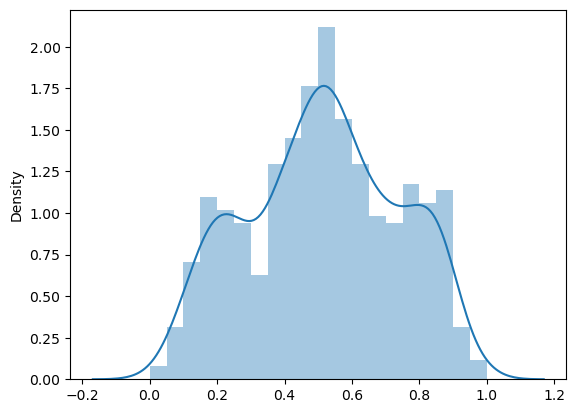

In [74]:
fig=plt.figure()
sns.distplot((y_train,y_train_cnt),bins=20)

In [75]:
df_test[var]=scalar.transform(df_test[var])
df_test

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
184,0,1,0,0.831783,0.657364,0.084219,0.933557,0.427086,0.692706,0,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,0.901354,0.610133,0.153728,0.265163,0.767976,0.712034,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.837699,0.334206,0.072539,0.346376,0.303382,0,...,1,0,0,0,0,1,0,0,1,0
221,0,0,1,0.881625,0.437098,0.339570,0.268820,0.559630,0.547400,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.314298,0.537414,0.223712,0.608143,0.569029,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1,0,0,0.257562,0.708888,0.287411,0.096312,0.376697,0.336516,1,...,0,0,0,0,1,0,0,0,1,0
702,1,0,1,0.519232,0.756118,0.283397,0.167327,0.871354,0.757478,0,...,0,0,0,0,0,0,1,0,0,0
127,0,0,0,0.584649,0.650923,0.069510,0.426394,0.420445,0.495973,0,...,0,0,0,0,1,0,0,0,0,0
640,1,0,1,0.745598,0.817947,0.052115,0.221274,0.985273,0.868615,0,...,1,0,0,0,0,0,0,1,1,0


In [76]:

x_test=df_test.drop(["casual","registered"],axis=1)
y_test=df_test.pop('cnt')

In [77]:
x_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.837699,0.334206,0.303382,0,0,1,...,1,0,0,0,0,1,0,0,1,0
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [78]:
c=x_train_rfe2.drop('const',axis=1)

In [79]:
col2=c.columns

In [80]:
x_test_rfe2=x_test[col2]

In [81]:
x_test_rfe2=sm.add_constant(x_test_rfe2)

In [82]:
x_test_rfe2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   const          219 non-null    float64
 1   temp           219 non-null    float64
 2   windspeed      219 non-null    float64
 3   cnt            219 non-null    float64
 4   season_spring  219 non-null    uint8  
 5   mnth_Jan       219 non-null    uint8  
 6   mnth_Jul       219 non-null    uint8  
 7   weekday_Sun    219 non-null    uint8  
dtypes: float64(4), uint8(4)
memory usage: 9.4 KB


In [83]:
y_pred=lm2.predict(x_test_rfe2)

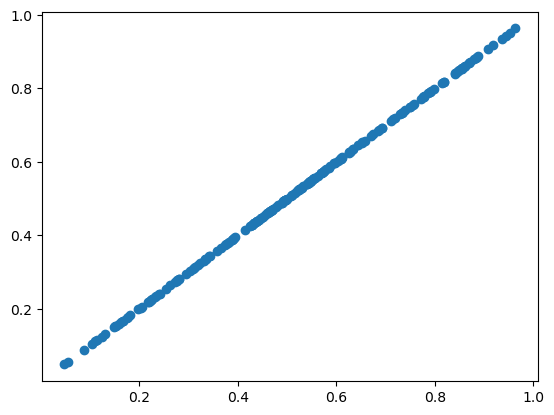

In [84]:
plt.figure()
plt.scatter(y_test,y_pred)

In [85]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

1.0

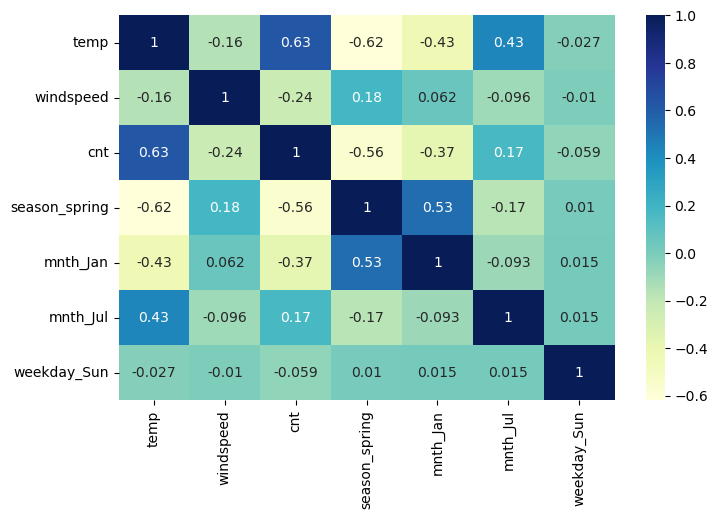

In [86]:
plt.figure(figsize=(8,5))
sns.heatmap(dataset[col2].corr(),cmap="YlGnBu",annot=True)
plt.show()